In [118]:
##bring in necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from datetime import datetime as dt

In [119]:
#read in csv files
install_tbl = pd.read_csv('install_table.csv')
event_tbl = pd.read_csv('event_table.csv')

In [120]:
#get size of the dataframes
display(install_tbl.shape)
display(event_tbl.shape)

(25404, 13)

(1133124, 17)

In [121]:
#display first five rows of the install table
display(install_tbl.head(5))

,platform,viewer_id,cross_app_id,install_id,install_date_utc,received_date,install_receipt_status,device_model,install_device_version,geo_city,geo_region,geo_country_code,attribution_network_id
0,ios,KI806222475DC542C88F46C5DD5C6DBA5B,14563241-177e-442e-b35a-206d1675907b,267652,2016-08-31 01:48:49,2016-11-23,null,iPad,9.3.3,Portland,TX,US,NaN
1,ios,KI010F235865BE4BAC92CCC342C591EF22,6cf81060-f50d-48e6-a730-bc46b46b62d0,269861,2016-09-01 14:49:42,2016-11-25,null,iPad,9.3.1,College Park,MD,US,NaN
2,ios,KI66FBF6EDB17646F380ED2A6606A2697E,f2a8abf6-1f0d-43d8-beec-181eb1027f27,363023,2016-09-10 21:05:10,2016-12-31,null,iPhone,9.3.5,NaN,OK,US,NaN
3,ios,KIDD1AF54DECB6466F9E3F4B28C12FD497,b4fee0ac-d2be-4045-b563-8db8f53cdbe6,235037,2016-09-15 15:53:37,2016-11-07,null,iPhone,9.3.5,Zanesville,OH,US,NaN
4,ios,KI7E995BB1F1BB4450A97E4BBE7421EBD5,772bf6d1-7cd2-42e7-b983-fded7166a0ff,288074,2016-10-12 03:22:37,2016-12-05,no_receipt,iPhone,10.0.2,Grand Junction,CO,US,NaN


In [122]:
#get simple summary of the data
install_tbl.describe(include=[np.object])

,platform,viewer_id,cross_app_id,install_date_utc,received_date,install_receipt_status,device_model,install_device_version,geo_city,geo_region,geo_country_code,attribution_network_id
count,25404,25404,21626,25404,25404,25404,25402,25400,23004,24270,25402,4638
unique,2,25000,21276,24922,65,4,1029,52,4424,121,96,8
top,ios,KA1f994889bc554113931c57cb4a6a6e8d,a89c72df-744c-46a4-88da-ee6e935bc909,2016-12-10 19:50:41,2016-12-10,no_receipt,iPhone,6.0.1,Houston,CA,US,90
freq,13381,2,2,4,807,17255,9055,6065,338,2501,24845,3912


One thing that jumps out is the frequency count of 2 for "viewer_id".  It's possible that the same viewer id exists for the separate platforms, but it's more likely that there are duplicate rows.  

In [123]:
install_tbl[install_tbl.duplicated()].shape

(404, 13)

There are 404 duplicate rows.  I remove these rows and re-run the describe method.  

In [124]:
#remove duplicates
install_tbl = install_tbl.drop_duplicates()
install_tbl.describe(include=[np.object])

,platform,viewer_id,cross_app_id,install_date_utc,received_date,install_receipt_status,device_model,install_device_version,geo_city,geo_region,geo_country_code,attribution_network_id
count,25000,25000,21276,25000,25000,25000,24998,24996,22645,23876,24998,4536
unique,2,25000,21276,24922,65,4,1029,52,4424,121,96,8
top,ios,KI8CE2F001704540B48FFF7434CC528650,114c0fca-8187-40fe-9333-39457989f212,2016-11-23 23:57:12,2016-12-27,no_receipt,iPhone,6.0.1,Houston,CA,US,90
freq,13188,1,1,2,559,16911,8923,5958,334,2452,24442,3812


The summary above provides potentially useful information.  

iOS edges out Android as the top platform but only by a few percentage points about 52% to 48%.  

About 68% of installs have a receipt status of "no_receipt"

90 is the attribution_network_id for close to 85% of observations, indicating that most of the installation can be attributed to one specific network.  

Location_Variables:
Close to 98% of installs were done in the US. This leads me to assume that the app has generally been marketed in the US to English speakers.  It's interesting to see that Houston has the highest number of installs.  That may be worth investigating.  Why Houston?
I see that the 'geo_region' field consists of state codes, pure numeric(82), and alphanumeric('I9')  To properly use this column for analysis, it would be best to understand what the non-state codes represent.  


We can see that there are 1029 unique device models, with iPhone being the most common.  The amount of unique devices initially seems overwhelming, so let's look at the the top perfromers. 

In [125]:
install_tbl['device_model'].value_counts()[0:15]

iPhone               8923
iPad                 4156
Samsung SM-G930V      291
Samsung SM-G935V      235
Samsung SM-G920V      229
KFFOWI                208
LGMS330               208
Z981                  196
Samsung SM-G900V      187
XT1585                184
Samsung SM-G930P      168
Samsung SM-G550T1     167
Samsung SM-G935A      140
Samsung SM-N920V      135
Samsung SM-G900A      120
Name: device_model, dtype: int64

It seems that after the iPhone and iPad, most of the list consists of Samsung variants.  According to Wikipedia, "Since September 2013, model numbers of devices in the Samsung Galaxy series are in the "SM-xxxx" format (excluding the Galaxy J SC-02F&SGH-N075T). Previously, from 2009 until September 2013, the model numbers were in the "GT-xxxx" format".  Knowing this, it would probably be best to simplify the different Samsung variant names, perhaps to as simply "Samsung Galaxy New", for post September 2013 models and "Samsung Galaxy Old", for those made previous to Sept 2013.

In [126]:
display(install_tbl.loc[install_tbl['device_model'].str.contains("Samsung",na=False),].shape)
display(install_tbl.loc[install_tbl['device_model'].str.contains("Samsung SM",na=False),].shape)
display(install_tbl.loc[install_tbl['device_model'].str.contains("Samsung GT",na=False),].shape)

(6380, 13)

(5914, 13)

(93, 13)

We can see that over 25.5% of the models are listed as Samsung--the vast majority of which are the ST newer Galaxy Models. 

Furthermore, digging deeper, I found that there are over 1500 LG variants and over 200 HTC variants.  So, for analysis, it would be wise to collapse the many unique identifiers into a manageable number.  

In [127]:
install_tbl[install_tbl['device_model'].str.contains("Samsung|iPad|iPhone")==False]['device_model'].value_counts()[0:15]

LGMS330    208
KFFOWI     208
Z981       196
XT1585     184
iPod       109
XT1254     107
LGMS631     74
LGLS775     72
XT1650      71
5054N       66
LGMS550     66
KFGIWI      60
XT1080      60
LGMS428     56
QTAQZ3      55
Name: device_model, dtype: int64

What about the date values.  Is there anything intersting to see there?

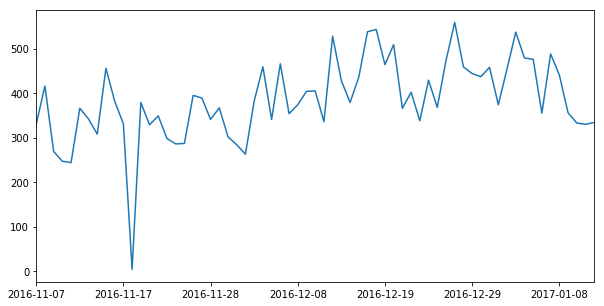

In [128]:
install_tbl['received_date'].value_counts().sort_index().plot(figsize=(10,5))

Generally, the installations/day vacillated between 300 and 500, with a large spike—total count 807--on 12/10/16.  There were only 4 installs on 11/19/2016.  That may be worth looking into.

## Event Table EDA

In [129]:
#first five rows of table
event_tbl.head(5)

,platform,viewer_id,cross_app_id,cross_app_id.1,install_id,received_date,timestamp,authenticated,event_name,video_id,show_id,season_number,episode_number,attribution_network_id,geo_city,geo_region,geo_country
0,ios,KIAE8730032E1E464393487AEF49FF1D2C,NaN,NaN,NaN,2016-11-07,2016-11-07 01:34:10,NaN,watched-ad,NaN,NaN,NaN,NaN,NaN,Wichita,KS,US
1,ios,KI15EED78458B2456C9D3A632B8D0D5433,NaN,NaN,233988.0,2016-11-07,2016-11-07 02:49:13,NaN,watched-ad,NaN,NaN,NaN,NaN,NaN,Danville,PA,US
2,ios,KI6CAE9F24F3B64919A911E541642EC2B7,NaN,NaN,235021.0,2016-11-07,2016-11-07 21:51:38,NaN,watched-ad,NaN,NaN,NaN,NaN,NaN,Pensacola,FL,US
3,ios,KIAC75F466A7D84C9E8D427ADFE76FC270,NaN,NaN,233746.0,2016-11-07,2016-11-07 00:40:23,NaN,watched-ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US
4,ios,KIA3C08F07A6C244AE953DB9AF933DB44C,NaN,NaN,233981.0,2016-11-07,2016-11-07 01:15:24,NaN,visited-show,NaN,556f360a6b66d1227a5a4a7b,NaN,NaN,NaN,Caguas,00,PR


In [130]:
#check for duplicates
event_tbl[event_tbl.duplicated()].shape

(430272, 17)

In [131]:
#remove duplicates and get basic summary of data
event_tbl = event_tbl.drop_duplicates()
event_tbl.describe(include=[np.object])

,platform,viewer_id,cross_app_id,cross_app_id.1,received_date,timestamp,authenticated,event_name,video_id,show_id,attribution_network_id,geo_city,geo_region,geo_country
count,702852,702852,590340,590340,702852,702852,5963,702852,57191,118300,32997,610276,648669,702852
unique,2,17502,14986,14907,65,644430,1,5,845,84,8,3830,75,34
top,ios,KI0BAD09DBE68149FBADFA03281945ECF3,a4a2bef7-bf06-4889-b98f-a34b3dd07240,ADBCE276-46CC-8DE1-18B6AD5C8F14,2017-01-07,2016-12-10 11:13:28,True,watched-ad,5846d1d76b66d1643a403c71,556f38e06b66d1227a5a4a8b,90,Dallas,TX,US
freq,583551,4480,4412,4412,19517,8,5963,555897,1696,22186,19226,8978,71765,697675


In [132]:
#convert datetime variable to datetime
event_tbl['timestamp']= pd.to_datetime(event_tbl['timestamp'])

In [133]:
event_tbl[(event_tbl['viewer_id']=='KI0BAD09DBE68149FBADFA03281945ECF3') & (event_tbl['event_name']=='watched-ad')]['received_date'].value_counts()[0:2]


2016-12-30    481
2017-01-02    393
Name: received_date, dtype: int64

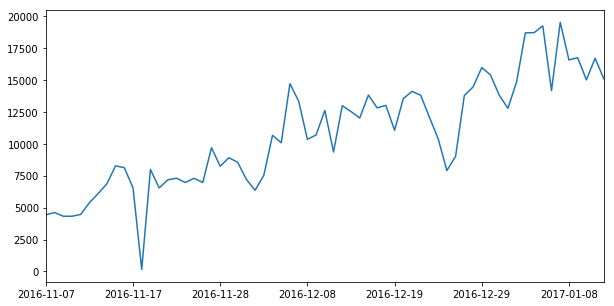

In [101]:
#plot of events over time
event_tbl['received_date'].value_counts().sort_index().plot(figsize=(10,5))

So, we see a general upward trend for events over time in this data set.  

In [134]:
event_tbl[event_tbl['event_name']=='watched-ad']['attribution_network_id'].value_counts(normalize=True)

90       0.400214
1,050    0.354177
3,881    0.194649
711      0.021773
912      0.011628
65       0.009314
4,291    0.005814
712      0.002432
Name: attribution_network_id, dtype: float64

90 is the most common attribution_network tied to the 'watched-ads' event.  

What can we see when looking at location of events?

In [116]:
event_tbl['geo_city'].value_counts(normalize=True)[0:10]

Dallas         0.014711
Houston        0.013610
San Antonio    0.010830
Denver         0.009343
Brooklyn       0.008488
Yuba City      0.007875
Clearwater     0.007652
Buena Park     0.007580
Las Vegas      0.007441
Los Angeles    0.007166
Name: geo_city, dtype: float64

In [117]:
event_tbl['geo_region'].value_counts(normalize=True)[0:10]

TX    0.110634
CA    0.098926
FL    0.069686
NY    0.048601
GA    0.040444
NC    0.038339
IL    0.037498
MI    0.037489
WA    0.037024
PA    0.033774
Name: geo_region, dtype: float64

Dallas is the most frequent city and TX the most frequently represented state.  This is helpful to know when considering which users to target.  